In [ ]:
!pip install factor_analyzer
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import re
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from factor_analyzer import FactorAnalyzer




In [ ]:


women_fashion = pd.read_csv('/content/AsosWomenfashion.csv')
men_fashion = pd.read_csv('/content/Asosmenfashion.csv')

df = pd.concat([women_fashion, men_fashion], ignore_index=True)


In [ ]:
women_fashion

product_id         brand_name  \
0       203649408             Beauut   
1       203351875           Lola May   
2       202386189          Liquorish   
3       203060420  French Connection   
4       203047112  French Connection   
...           ...                ...   
43627   203652134               Dune   
43628   203778655               Dune   
43629   203202947             NaaNaa   
43630   204060148         Brave Soul   
43631   204347411  French Connection   

                                                   title  current_price  \
0      Beauut Bridesmaid allover embellished maxi dre...         176.00   
1      Lola May midaxi tiered shirt dress in abstract...          43.00   
2      Liquorish a line lace detail midi dress in flo...          51.00   
3      French Connection Mozart high neck jumper in b...          84.00   
4      French Connection front seam wide sleeve jumpe...          92.00   
...                                                  ...            ...   
43627         Dune jacquard logo cross body bag in brown          53.69   
43628        Dune cosmetics bag gift set in tan monogram          47.37   
43629  NaaNaa yellow mini dress with cut out detail a...          48.00   
43630           Brave Soul strappy back swimsuit in navy          27.00   
43631  French Connection triangle bikini top in pink ...          31.00   

       previous_price  colour currency     rrp  productCode      productType  
0                 NaN     NaN      USD  241.00    121375112          Product  
1                 NaN     NaN      USD   62.00    120646950          Product  
2                 NaN     NaN      USD  125.00    116551828          Product  
3                 NaN     NaN      USD  109.00    119500511          Product  
4                 NaN     NaN      USD  143.00    119484683          Product  
...               ...     ...      ...     ...          ...              ...  
43627           66.32     NaN      USD  108.96    121950307          Product  
43628           58.43     NaN      USD   91.59    122836149          Product  
43629             NaN     NaN      USD   78.00    120046949          Product  
43630             NaN     NaN      USD   53.00    124523798          Product  
43631             NaN     NaN      USD   51.00    126673897  MixMatchProduct  

[43632 rows x 10 columns]

In [ ]:
men_fashion

product_id         brand_name  \
0       204499665             Replay   
1       203420859       Jack & Jones   
2       204285229       Jack & Jones   
3       202261918  Don't Think Twice   
4       202191610  Another Influence   
...           ...                ...   
17563    14391426               Puma   
17564   202859508         Brave Soul   
17565   202097847   adidas Originals   
17566   202621977              Bench   
17567   203575343          Collusion   

                                                   title  current_price  \
0                                Replay t-shirt in white          72.00   
1              Jack & Jones script logo t-shirt in white          17.00   
2                   Jack & Jones logo polo in pale green          34.00   
3                   DTT denim board shorts in light blue          31.00   
4      Another Influence towelling shorts co-ord in m...          23.00   
...                                                  ...            ...   
17563          Puma Training Retaliate trainers in black          73.43   
17564           Brave Soul 5 pack trainer socks in black           9.47   
17565    adidas Originals side logo t-shirt in off white          30.79   
17566                 Bench 5 pack sports socks in white          13.42   
17567  COLLUSION knitted brushed cardigan with jacqua...          30.30   

       previous_price  colour currency     rrp  productCode productType  
0                 NaN     NaN      USD  100.00    127434315     Product  
1                 NaN     NaN      USD   21.00    121133019     Product  
2                 NaN     NaN      USD   43.00    126403589     Product  
3                 NaN     NaN      USD   42.00    116069818     Product  
4                 NaN     NaN      USD   48.00    115976447     Product  
...               ...     ...      ...     ...          ...         ...  
17563           91.59     NaN      USD     NaN      1638384     Product  
17564           12.63     NaN      USD   20.53    118842162     Product  
17565           47.37     NaN      USD     NaN    115601847     Product  
17566           16.58     NaN      USD   33.16    117696507     Product  
17567           50.52     NaN      USD     NaN    121453384     Product  

[17568 rows x 10 columns]

In [ ]:
df.head()

product_id         brand_name  \
0   203649408             Beauut   
1   203351875           Lola May   
2   202386189          Liquorish   
3   203060420  French Connection   
4   203047112  French Connection   

                                               title  current_price  \
0  Beauut Bridesmaid allover embellished maxi dre...          176.0   
1  Lola May midaxi tiered shirt dress in abstract...           43.0   
2  Liquorish a line lace detail midi dress in flo...           51.0   
3  French Connection Mozart high neck jumper in b...           84.0   
4  French Connection front seam wide sleeve jumpe...           92.0   

   previous_price  colour currency    rrp  productCode productType  
0             NaN     NaN      USD  241.0    121375112     Product  
1             NaN     NaN      USD   62.0    120646950     Product  
2             NaN     NaN      USD  125.0    116551828     Product  
3             NaN     NaN      USD  109.0    119500511     Product  
4             NaN     NaN      USD  143.0    119484683     Product

In [ ]:
df.tail()

product_id        brand_name  \
61195    14391426              Puma   
61196   202859508        Brave Soul   
61197   202097847  adidas Originals   
61198   202621977             Bench   
61199   203575343         Collusion   

                                                   title  current_price  \
61195          Puma Training Retaliate trainers in black          73.43   
61196           Brave Soul 5 pack trainer socks in black           9.47   
61197    adidas Originals side logo t-shirt in off white          30.79   
61198                 Bench 5 pack sports socks in white          13.42   
61199  COLLUSION knitted brushed cardigan with jacqua...          30.30   

       previous_price  colour currency    rrp  productCode productType  
61195           91.59     NaN      USD    NaN      1638384     Product  
61196           12.63     NaN      USD  20.53    118842162     Product  
61197           47.37     NaN      USD    NaN    115601847     Product  
61198           16.58     NaN      USD  33.16    117696507     Product  
61199           50.52     NaN      USD    NaN    121453384     Product

In [ ]:
df.shape

(61200, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61200 entries, 0 to 61199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61200 non-null  int64  
 1   brand_name      61200 non-null  object 
 2   title           61200 non-null  object 
 3   current_price   61200 non-null  float64
 4   previous_price  25280 non-null  float64
 5   colour          0 non-null      float64
 6   currency        61200 non-null  object 
 7   rrp             43326 non-null  float64
 8   productCode     61200 non-null  int64  
 9   productType     61200 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 4.7+ MB


Missingness Map using missingno:


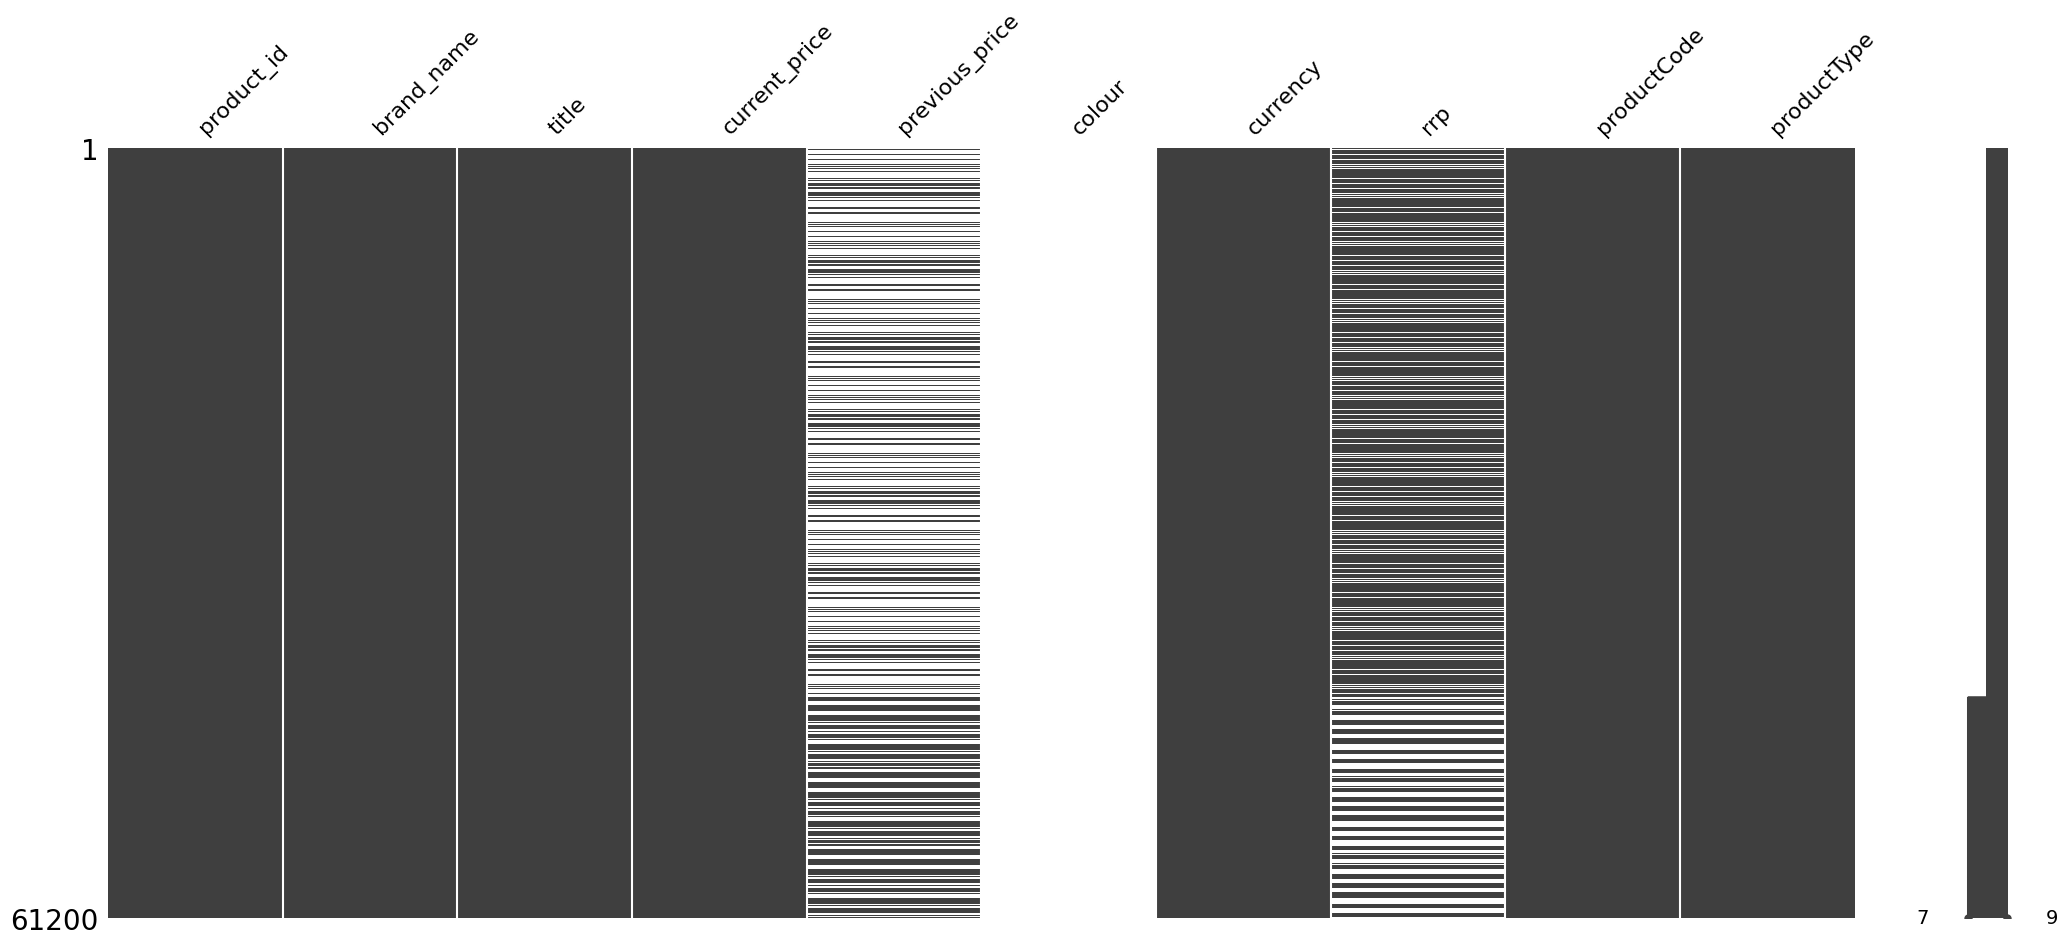

Missingness Map using seaborn and matplotlib:


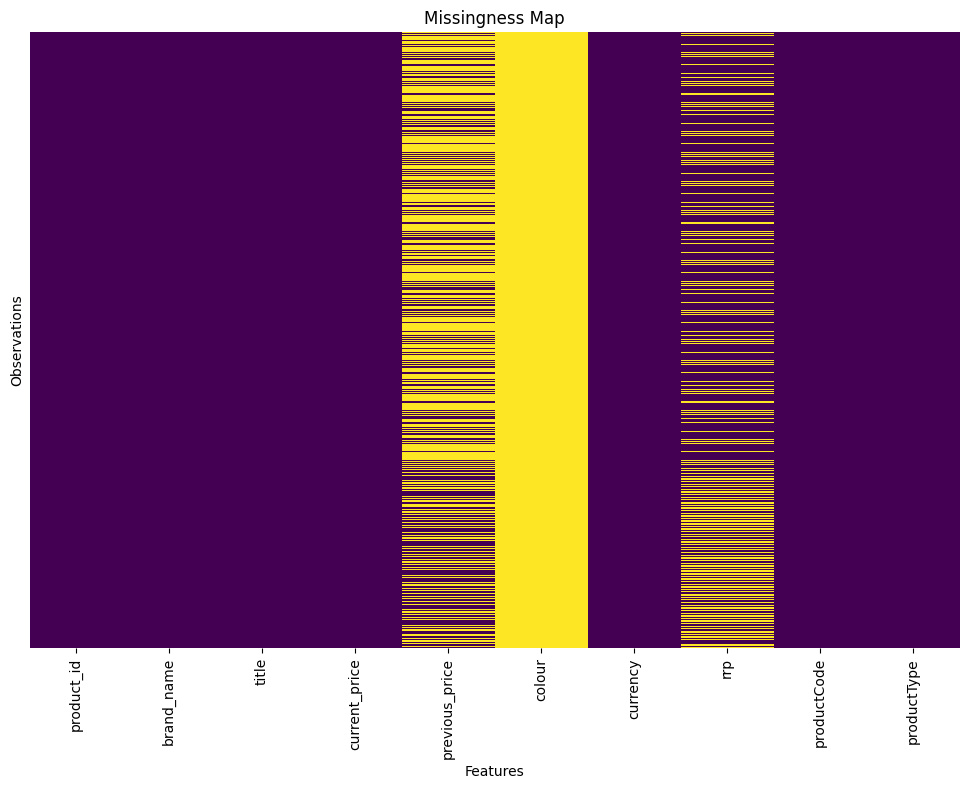

In [ ]:

print("Missingness Map using missingno:")
msno.matrix(df)
plt.show()


print("Missingness Map using seaborn and matplotlib:")
missing_mask = df.isna()
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missingness Map')
plt.xlabel('Features')
plt.ylabel('Observations')
plt.show()


In [ ]:
df = df.drop(columns=['colour'])

In [ ]:
df.isnull().sum()

product_id            0
brand_name            0
title                 0
current_price         0
previous_price    35920
currency              0
rrp               17874
productCode           0
productType           0
dtype: int64

In [ ]:
df.nunique()

product_id        144
brand_name         61
title             144
current_price      83
previous_price     38
currency            1
rrp                54
productCode       144
productType         3
dtype: int64

In [ ]:
df = df.dropna(subset=['previous_price'])

df['rrp'].fillna(df['rrp'].mean(), inplace=True)

In [ ]:
dress_types = [
    'maxi dress', 'shirt dress', 'midi dress', 'jumper', 'jeans',
    'top', 'jumpsuit', 'mini dress', 'boots', 'trousers', 'bag',
    'bikini', 'swimwear', 'swimsuit', 'skirt', 'coat', 'jacket',
    'cardigan', 'blazer', 'blouse', 'shorts', 'shoes', 'trainers',
    'scarf', 'hat', 't-shirt', 'leggings', 'sweatshirt', 'pullover',
    'hoodie', 'belt', 'watch', 'midaxi dress', 'bodycon dress',
    'flared jeans', 'straight leg jeans', 'wide leg trousers',
    'cropped jeans', 'denim jacket', 'quilted jacket', 'espadrilles',
    'crossbody bag', 'shoulder bag', 'backpack', 'shirt', 'socks',
    'polo', 'suit', 'loafers', 'sandals', 'flats', 'heels',
    'puffer jacket', 'oversized t-shirt', 'cargo trousers', 'co-ord',
    'chunky trainers', 'leather belt', 'baker boy hat', 'ankle boots',
    'slip dress', 'mule sliders', 'gift set', 'gift', 'set',
    'lip gloss', 'lip liner', 'skipping rope', 'serum', 't-shirts',
    'mini smock dress', 'embellished split dress', 'beach dress', 'gua sha',
  'joggers'
]

pattern = r'\b(' + '|'.join(map(re.escape, dress_types)) + r')\b'

def extract_dress_type(title):
    title = title.lower()
    match = re.search(pattern, title, re.IGNORECASE)
    return match.group(0) if match else 'others'

df['dress_type'] = df['title'].apply(extract_dress_type)

dress_type_counts = df['dress_type'].value_counts()
print(dress_type_counts)

dress_type
others               3046
t-shirt              2684
jumper               2668
bag                  2424
jeans                1456
gift set             1212
cardigan              850
jacket                850
oversized t-shirt     732
trainers              732
flared jeans          606
coat                  606
shoulder bag          606
suit                  606
cargo trousers        606
boots                 606
wide leg trousers     606
denim jacket          606
puffer jacket         606
lip gloss             488
lip liner             488
serum                 488
socks                 488
hoodie                244
trousers              244
joggers               244
t-shirts              244
skipping rope         244
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

product_id        0
brand_name        0
title             0
current_price     0
previous_price    0
currency          0
rrp               0
productCode       0
productType       0
dress_type        0
dtype: int64

In [ ]:
df.nunique()

product_id        68
brand_name        29
title             68
current_price     51
previous_price    38
currency           1
rrp               15
productCode       68
productType        2
dress_type        28
dtype: int64

In [ ]:
df['price_diff'] = df['previous_price'] - df['current_price']

df['title_length'] = df['title'].apply(len)

df['discount_percentage'] = ((df['rrp'] - df['current_price']) / df['rrp']) * 100


brand_counts = df['brand_name'].value_counts().to_dict()


brand_rrp = df.groupby('brand_name')['rrp'].mean().to_dict()


max_count = max(brand_counts.values())
max_rrp = max(brand_rrp.values())

normalized_counts = {k: v / max_count for k, v in brand_counts.items()}
normalized_rrp = {k: v / max_rrp for k, v in brand_rrp.items()}


combined_popularity = {k: (normalized_counts[k] + normalized_rrp[k]) / 2 for k in brand_counts.keys()}


df['brand_popularity'] = df['brand_name'].map(combined_popularity)

In [ ]:
df['current_price'] = df['current_price'].astype(float)
df['previous_price'] = df['previous_price'].astype(float)
df['rrp'] = df['rrp'].astype(float)
df['price_diff'] = df['price_diff'].astype(float)
df['title_length'] = df['title_length'].astype(int)
df['discount_percentage'] = df['discount_percentage'].astype(float)

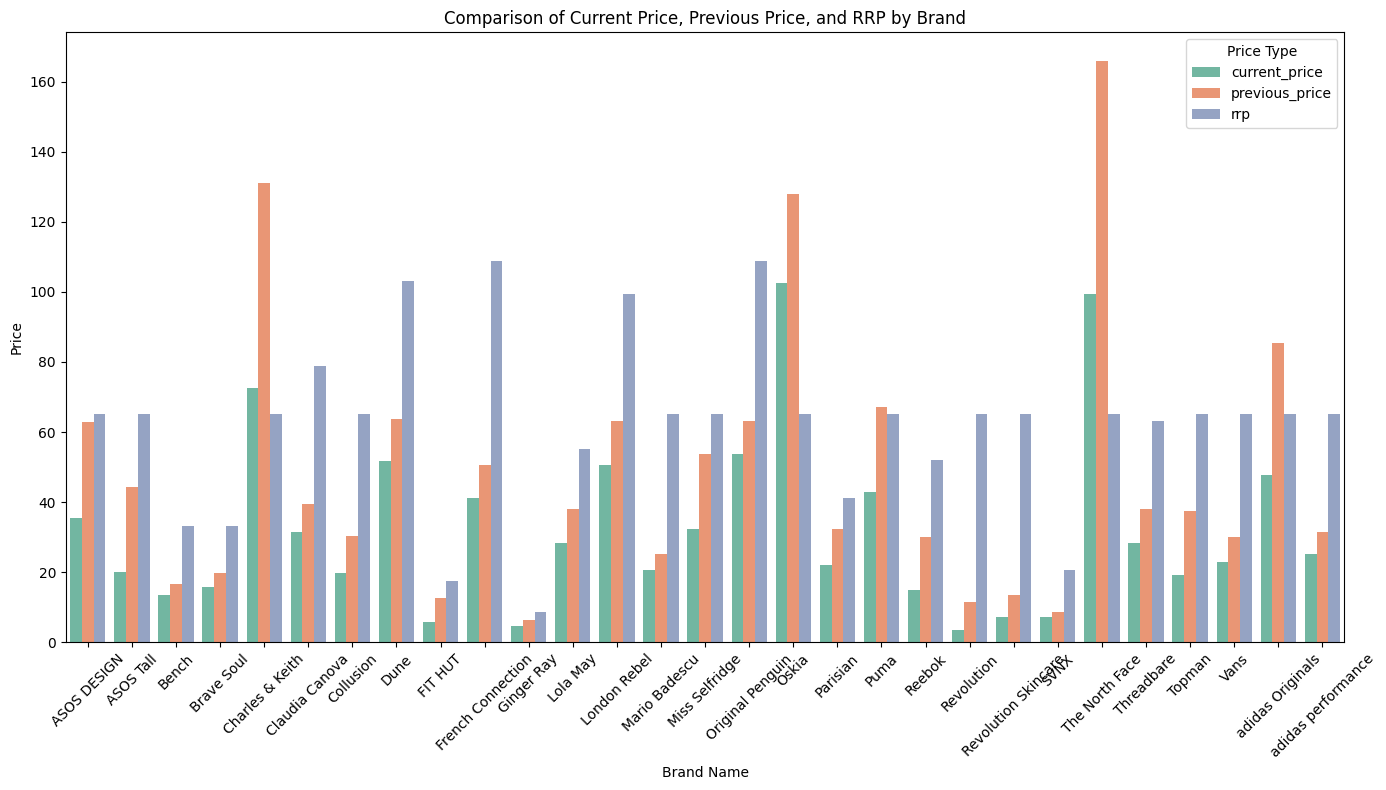

In [ ]:
price_means = df.groupby('brand_name')[['current_price', 'previous_price', 'rrp']].mean().reset_index()


price_means_melted = pd.melt(price_means, id_vars='brand_name', value_vars=['current_price', 'previous_price', 'rrp'],
                             var_name='Price Type', value_name='Price')


plt.figure(figsize=(14, 8))
sns.barplot(x='brand_name', y='Price', hue='Price Type', data=price_means_melted, palette='Set2')

plt.title('Comparison of Current Price, Previous Price, and RRP by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.tight_layout()

plt.show()


In [ ]:
fig = px.scatter_3d(
    df,
    x='current_price',
    y='previous_price',
    z='rrp',
    color='brand_name',
    labels={
        'current_price': 'Current Price',
        'previous_price': 'Previous Price',
        'rrp': 'RRP',
        'brand_name': 'Brand Name'
    },
    title='3D Scatter Plot of Prices by Brand'
)


fig.show()


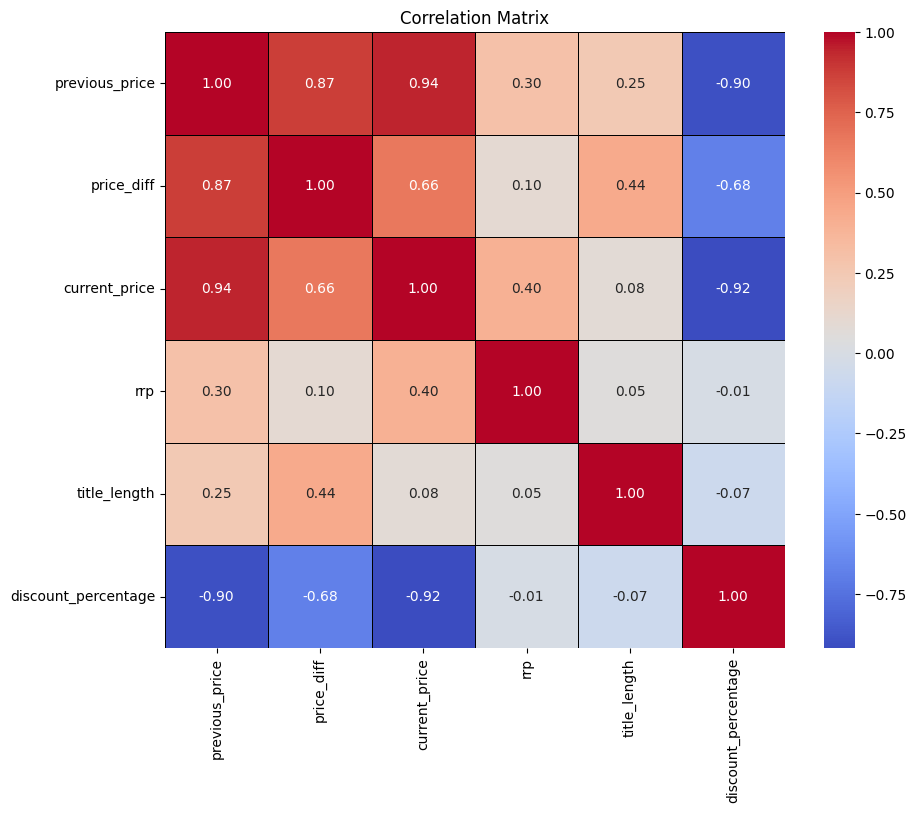

In [ ]:
numerical_cols = ['previous_price', 'price_diff', 'current_price', 'rrp', 'title_length', 'discount_percentage']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


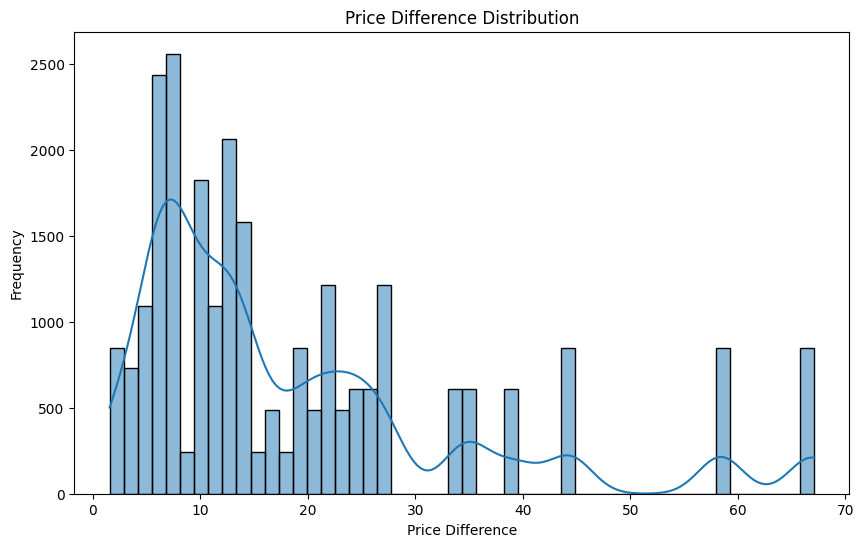

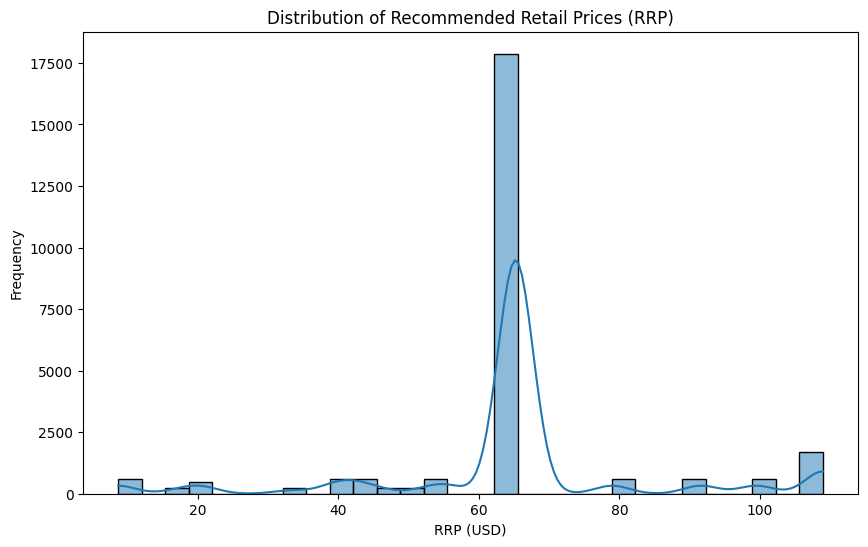

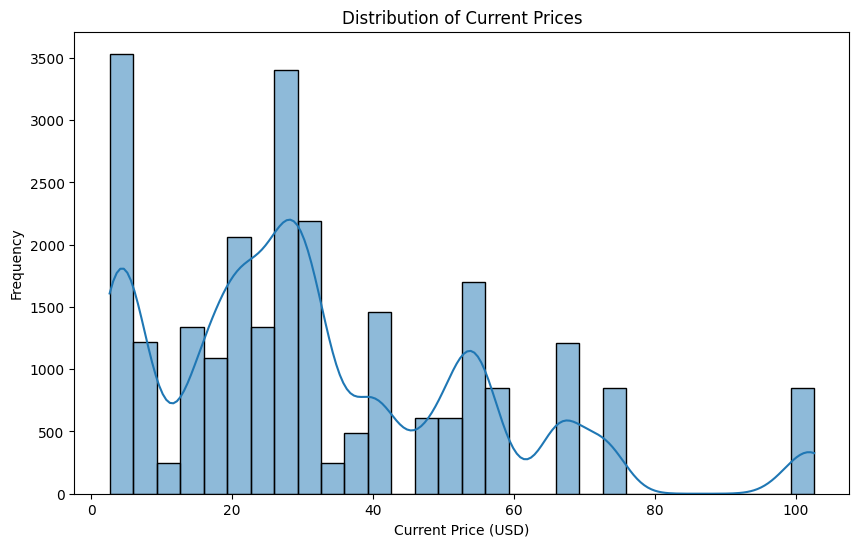

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff'], bins=50, kde=True)
plt.title('Price Difference Distribution')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['rrp'].dropna(), bins=30, kde=True)
plt.title('Distribution of Recommended Retail Prices (RRP)')
plt.xlabel('RRP (USD)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['current_price'], bins=30, kde=True)
plt.title('Distribution of Current Prices')
plt.xlabel('Current Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fig = px.scatter(df, x='previous_price', y='current_price', color='discount_percentage',
                 hover_data=['brand_name', 'title', 'productType'],
                 title='Current Price vs Previous Price Colored by Discount Percentage')
fig.show()


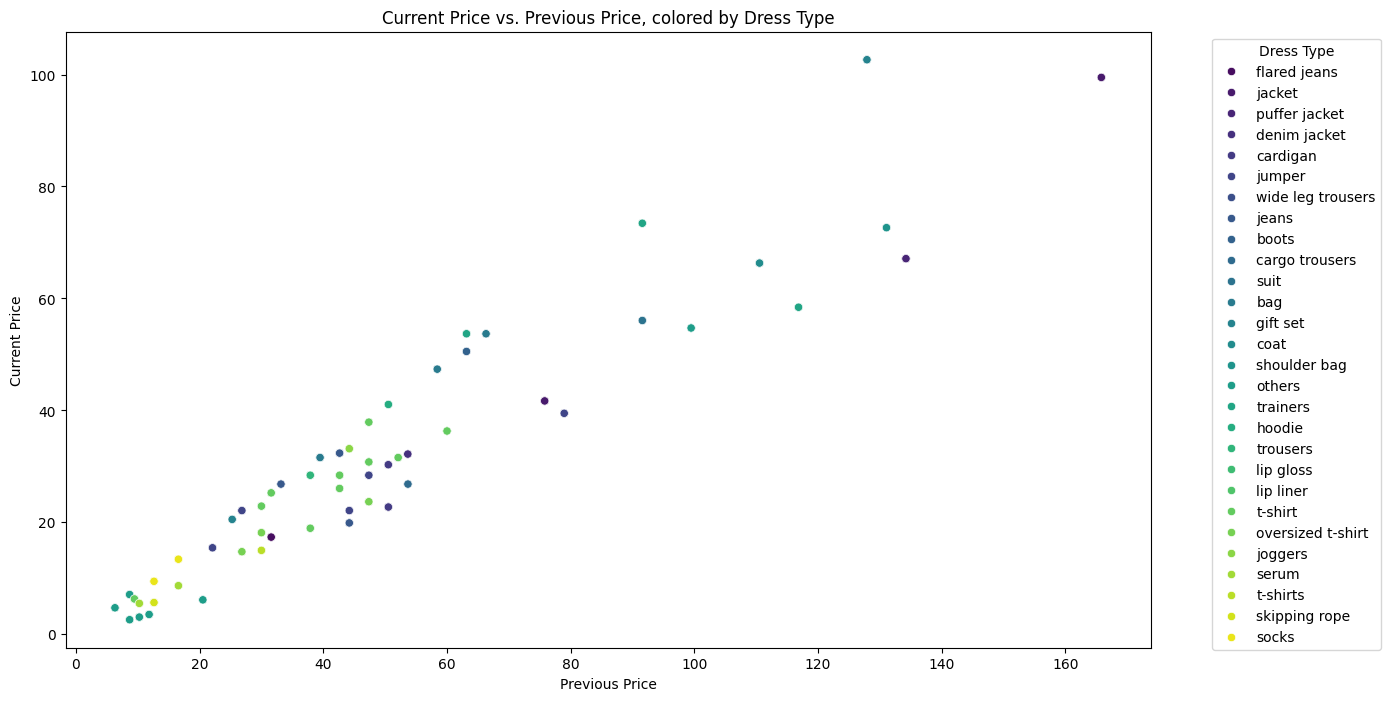

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='previous_price', y='current_price', hue='dress_type', palette='viridis')
plt.title('Current Price vs. Previous Price, colored by Dress Type')
plt.xlabel('Previous Price')
plt.ylabel('Current Price')
plt.legend(title='Dress Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


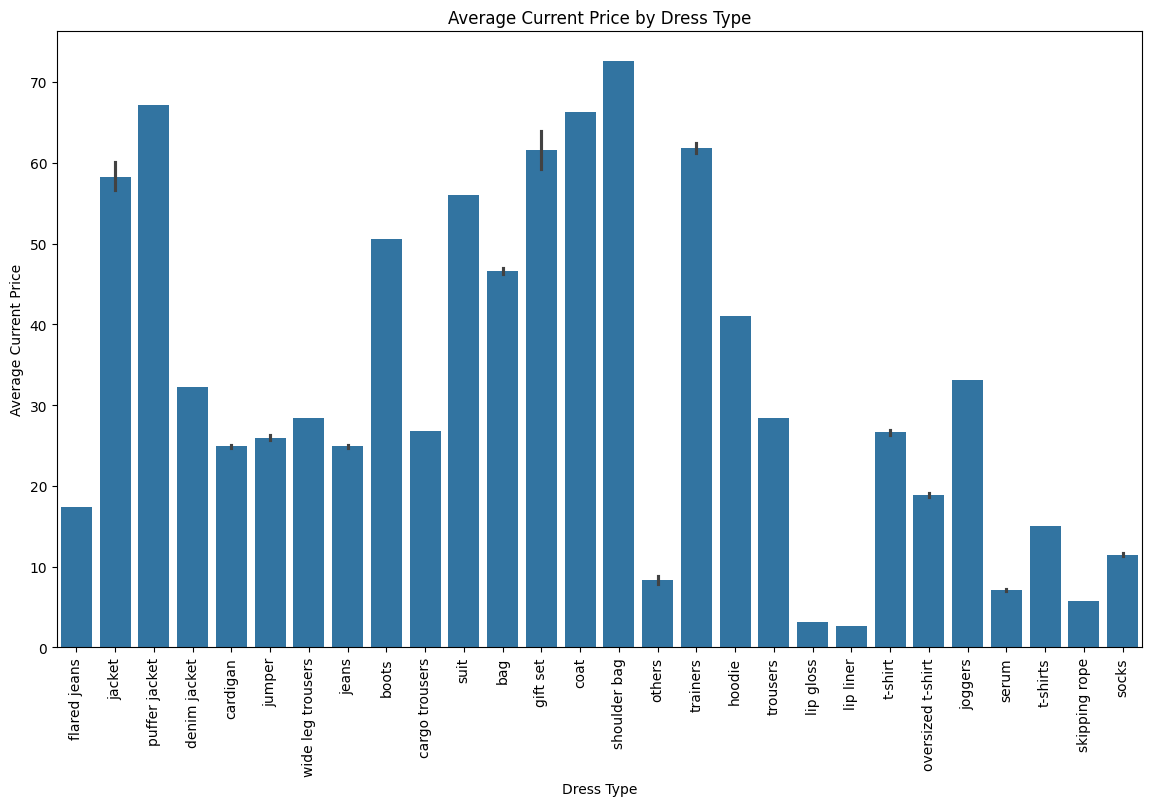

In [ ]:

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dress_type', y='current_price', estimator=np.mean)
plt.title('Average Current Price by Dress Type')
plt.xlabel('Dress Type')
plt.ylabel('Average Current Price')
plt.xticks(rotation=90)
plt.show()


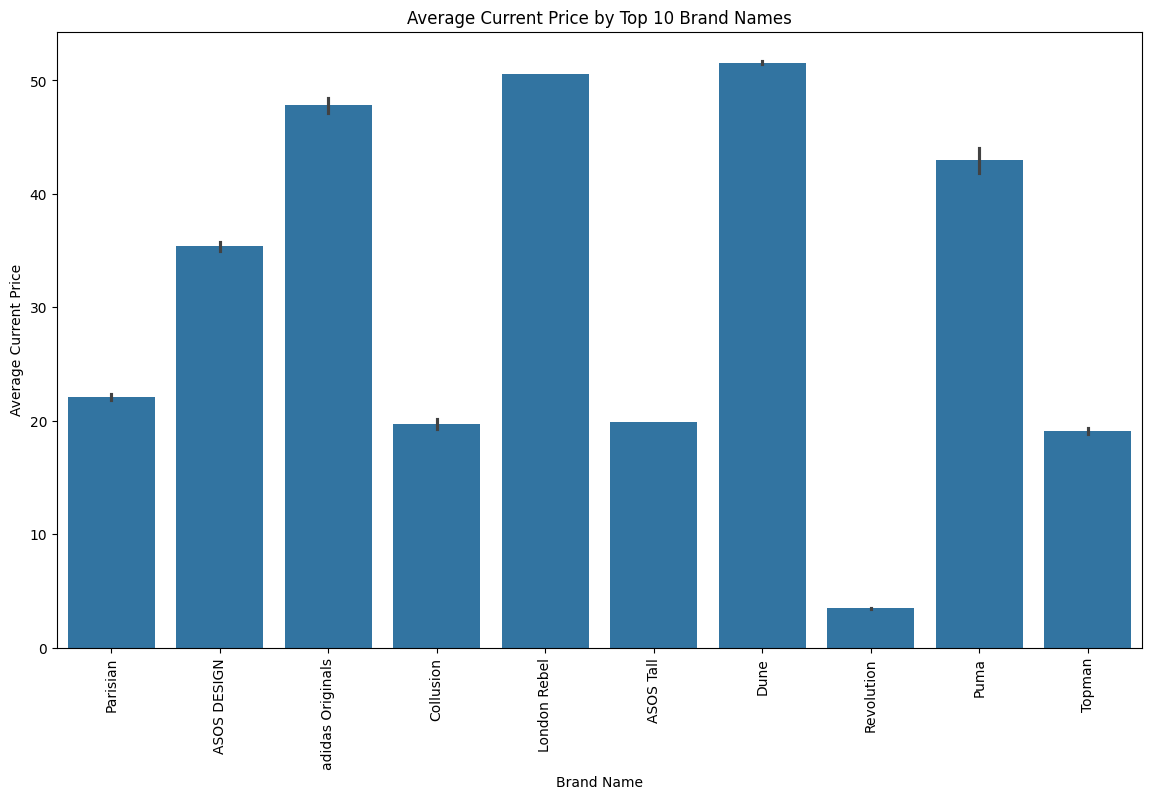

In [ ]:
top_brands = df['brand_name'].value_counts().head(10).index
top_brands_df = df[df['brand_name'].isin(top_brands)]

plt.figure(figsize=(14, 8))
sns.barplot(data=top_brands_df, x='brand_name', y='current_price', estimator=np.mean)
plt.title('Average Current Price by Top 10 Brand Names')
plt.xlabel('Brand Name')
plt.ylabel('Average Current Price')
plt.xticks(rotation=90)
plt.show()


In [ ]:
top_brands = df['brand_name'].value_counts().head(20)
top_brands

brand_name
ASOS DESIGN            5824
Revolution             2928
adidas Originals       1826
Dune                   1818
Puma                   1220
Parisian               1212
Collusion               850
Topman                  732
London Rebel            606
ASOS Tall               606
Claudia Canova          606
Oskia                   606
Mario Badescu           606
Ginger Ray              606
Lola May                606
Miss Selfridge          606
Charles & Keith         606
Brave Soul              488
Revolution Skincare     488
FIT HUT                 244
Name: count, dtype: int64

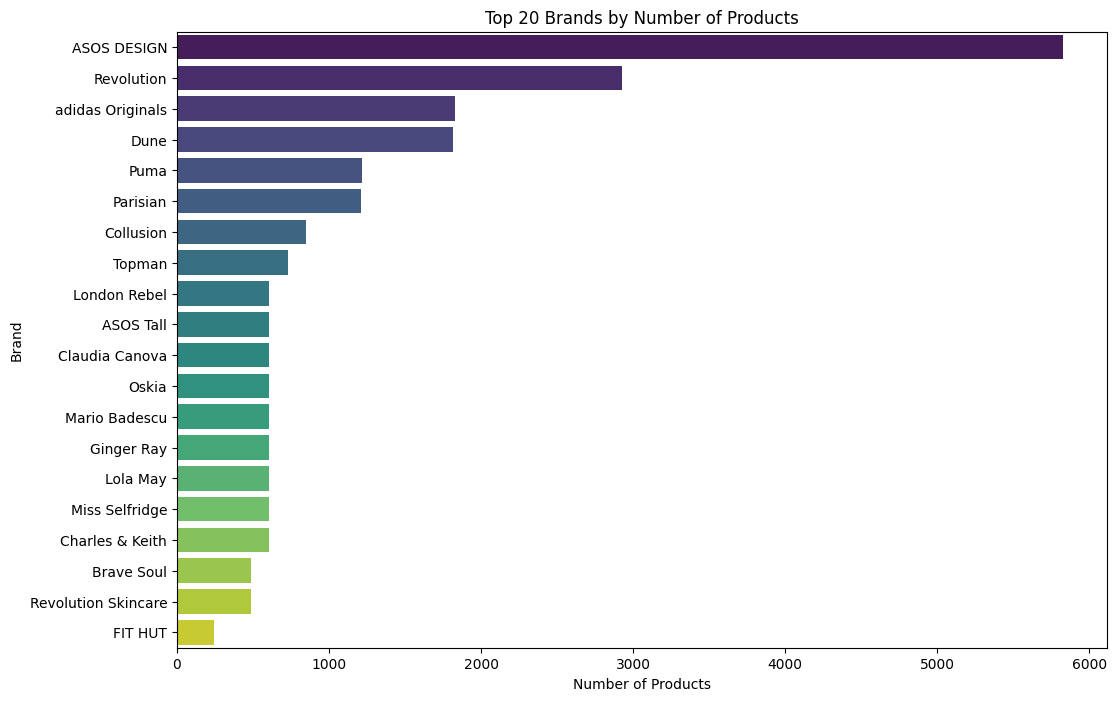

In [ ]:

top_brands = df['brand_name'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_brands.index, x=top_brands.values, palette='viridis')
plt.title('Top 20 Brands by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

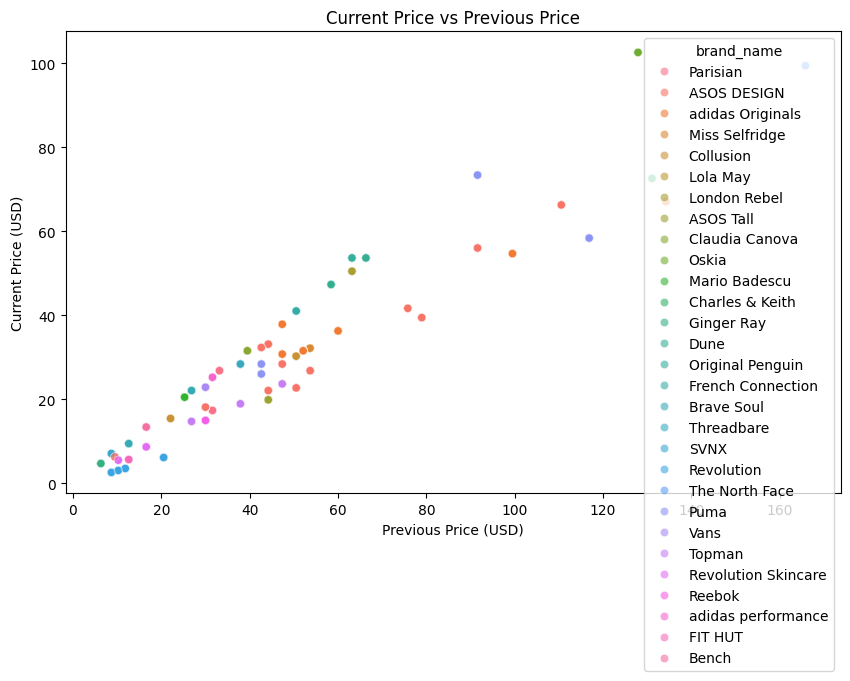

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='previous_price', y='current_price', hue='brand_name', legend=True, alpha=0.6)
plt.title('Current Price vs Previous Price')
plt.xlabel('Previous Price (USD)')
plt.ylabel('Current Price (USD)')
plt.show()

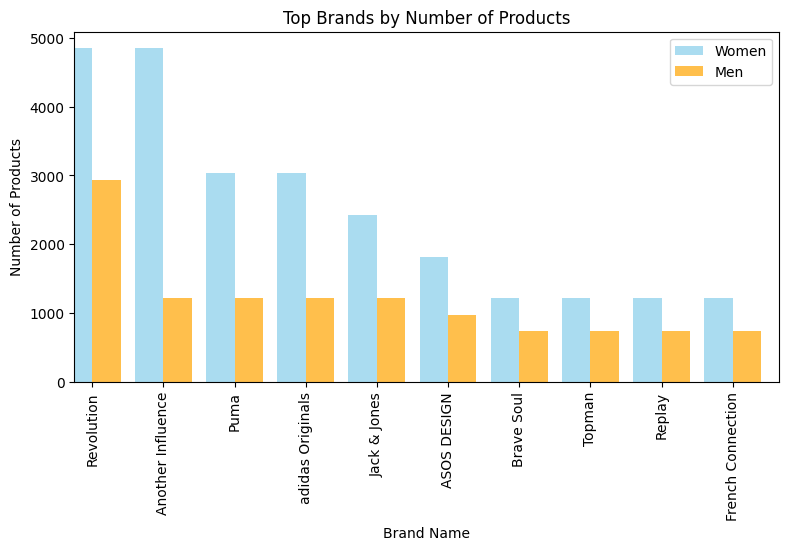

In [ ]:
top_brands_women = women_fashion['brand_name'].value_counts().head(10)
top_brands_men = men_fashion['brand_name'].value_counts().head(10)

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 2)
top_brands_women.plot(kind='bar', color='skyblue', alpha=0.7, label='Women', position=1, width=0.4)
top_brands_men.plot(kind='bar', color='orange', alpha=0.7, label='Men', position=0, width=0.4)
plt.title('Top Brands by Number of Products')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.legend()

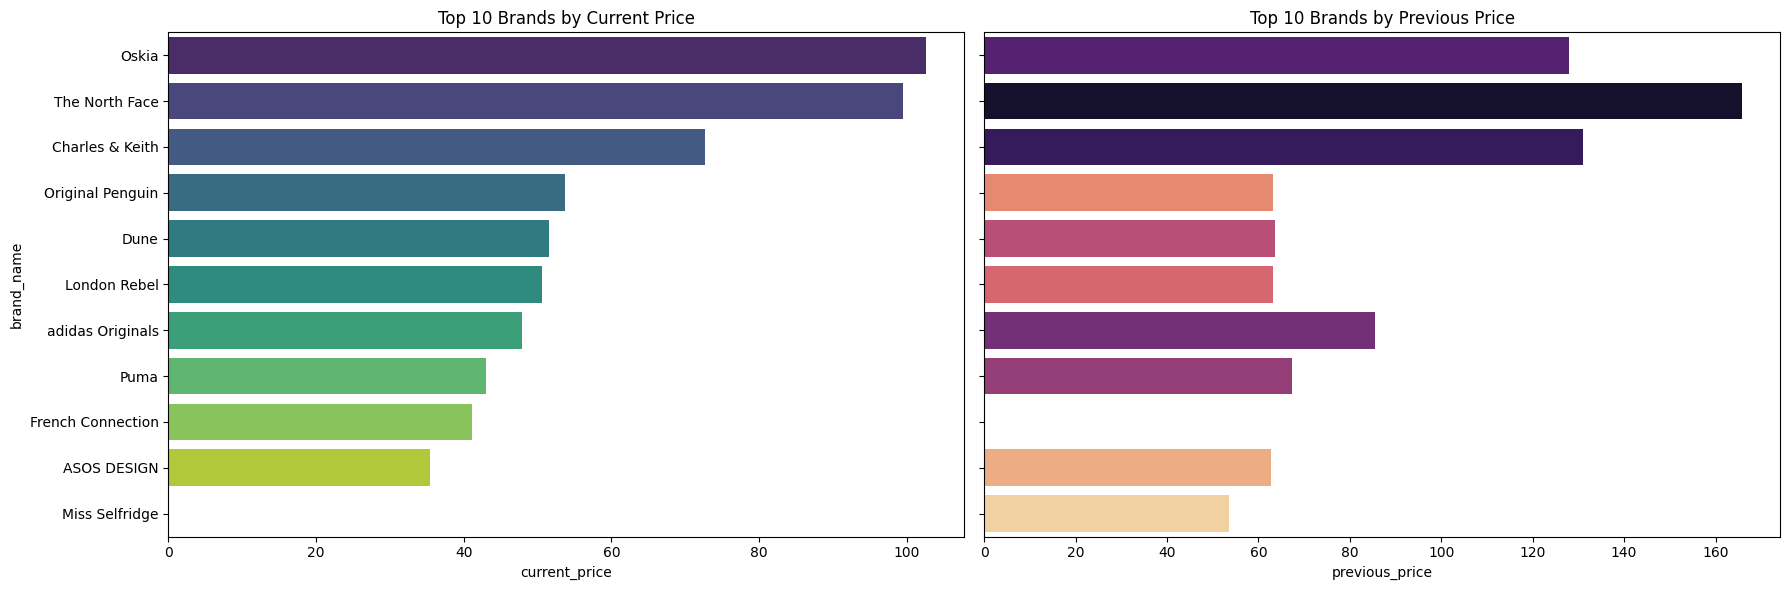

In [ ]:
top10_current_price = df[['brand_name', 'current_price']].dropna()
top10_current_price = top10_current_price.groupby('brand_name').mean().reset_index()
top10_current_price = top10_current_price.sort_values(by='current_price', ascending=False).head(10)


top10_previous_price = df[['brand_name', 'previous_price']].dropna()
top10_previous_price = top10_previous_price.groupby('brand_name').mean().reset_index()
top10_previous_price = top10_previous_price.sort_values(by='previous_price', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)


sns.barplot(x='current_price', y='brand_name', data=top10_current_price, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Brands by Current Price')


sns.barplot(x='previous_price', y='brand_name', data=top10_previous_price, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Brands by Previous Price')

plt.tight_layout()
plt.show()


In [ ]:
fig = px.scatter(df, x='title_length', y='current_price',
                 labels={'title_length': 'Title Length', 'current_price': 'Current Price'},
                 title='Scatter Plot between Title Length and Current Price')
fig.show()


In [ ]:
fig = px.scatter(df, x='title_length', y='current_price',
                 color='brand_popularity',
                 labels={'title_length': 'Title Length', 'current_price': 'Current Price'},
                 title='Scatter Plot between Title Length and Current Price (colored by Brand Popularity)',
                 color_continuous_scale='Viridis')
fig.show()

In [ ]:
!pip install factor_analyzer


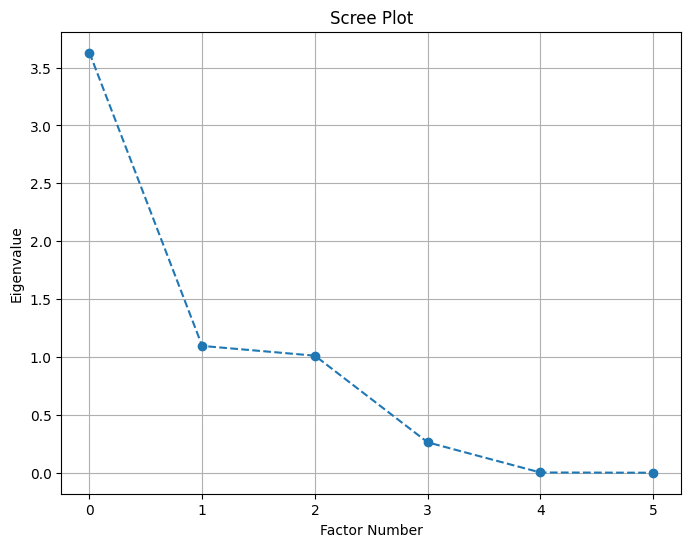

Number of factors to retain: 3
Factor Loadings:
                      Factor1   Factor2   Factor3
previous_price       0.893058  0.188556  0.406156
price_diff           0.621634 -0.002827  0.780936
current_price        0.950909  0.292091  0.093123
rrp                  0.109250  0.990881  0.039791
title_length         0.027281  0.029516  0.536675
discount_percentage -0.988188  0.105522 -0.085848

Factor Scores for the first few observations:
    Factor1   Factor2   Factor3
0 -0.250307 -1.318454 -0.223375
1  0.358178 -0.076783  0.952334
2  1.384057 -0.261795  2.805806
3 -0.021339 -0.006995  0.229470
4 -0.549296  0.013845  1.167522


In [ ]:
numerical_cols = ['previous_price', 'price_diff', 'current_price', 'rrp', 'title_length', 'discount_percentage']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

fa = FactorAnalyzer(n_factors=len(numerical_cols), rotation=None)
fa.fit(scaled_data)

eigenvalues, _ = fa.get_eigenvalues()
eigenvalues = np.array(eigenvalues)

plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, marker='o', linestyle='--')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


n_factors = np.sum(eigenvalues > 1)
print(f"Number of factors to retain: {n_factors}")


fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_data)


loadings = fa.loadings_
print("Factor Loadings:")
print(pd.DataFrame(loadings, index=numerical_cols, columns=[f'Factor{i+1}' for i in range(n_factors)]))


factors = fa.transform(scaled_data)
print("\nFactor Scores for the first few observations:")
print(pd.DataFrame(factors, columns=[f'Factor{i+1}' for i in range(n_factors)]).head())


In [ ]:
df['productType'].value_counts()

productType
Product          24674
MixMatchGroup      606
Name: count, dtype: int64

In [ ]:
df.drop(columns=['productType'], inplace=True)

In [ ]:
from scipy import stats
mean_value = 100
t_stat, p_value = stats.ttest_1samp(df['current_price'].dropna(), mean_value)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


contingency_table = pd.crosstab(df['brand_name'], df['dress_type'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared test results: chi2-statistic = {chi2_stat}, p-value = {p_value}, degrees of freedom = {dof}")


T-test results: t-statistic = -464.6379861732815, p-value = 0.0
Chi-squared test results: chi2-statistic = 409235.5358426698, p-value = 0.0, degrees of freedom = 756


In [ ]:
grouped_data = [df[df['brand_name'] == brand]['current_price'].dropna() for brand in df['brand_name'].unique()]


f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"One-Way ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")


One-Way ANOVA results: F-statistic = 4133.381124821588, p-value = 0.0


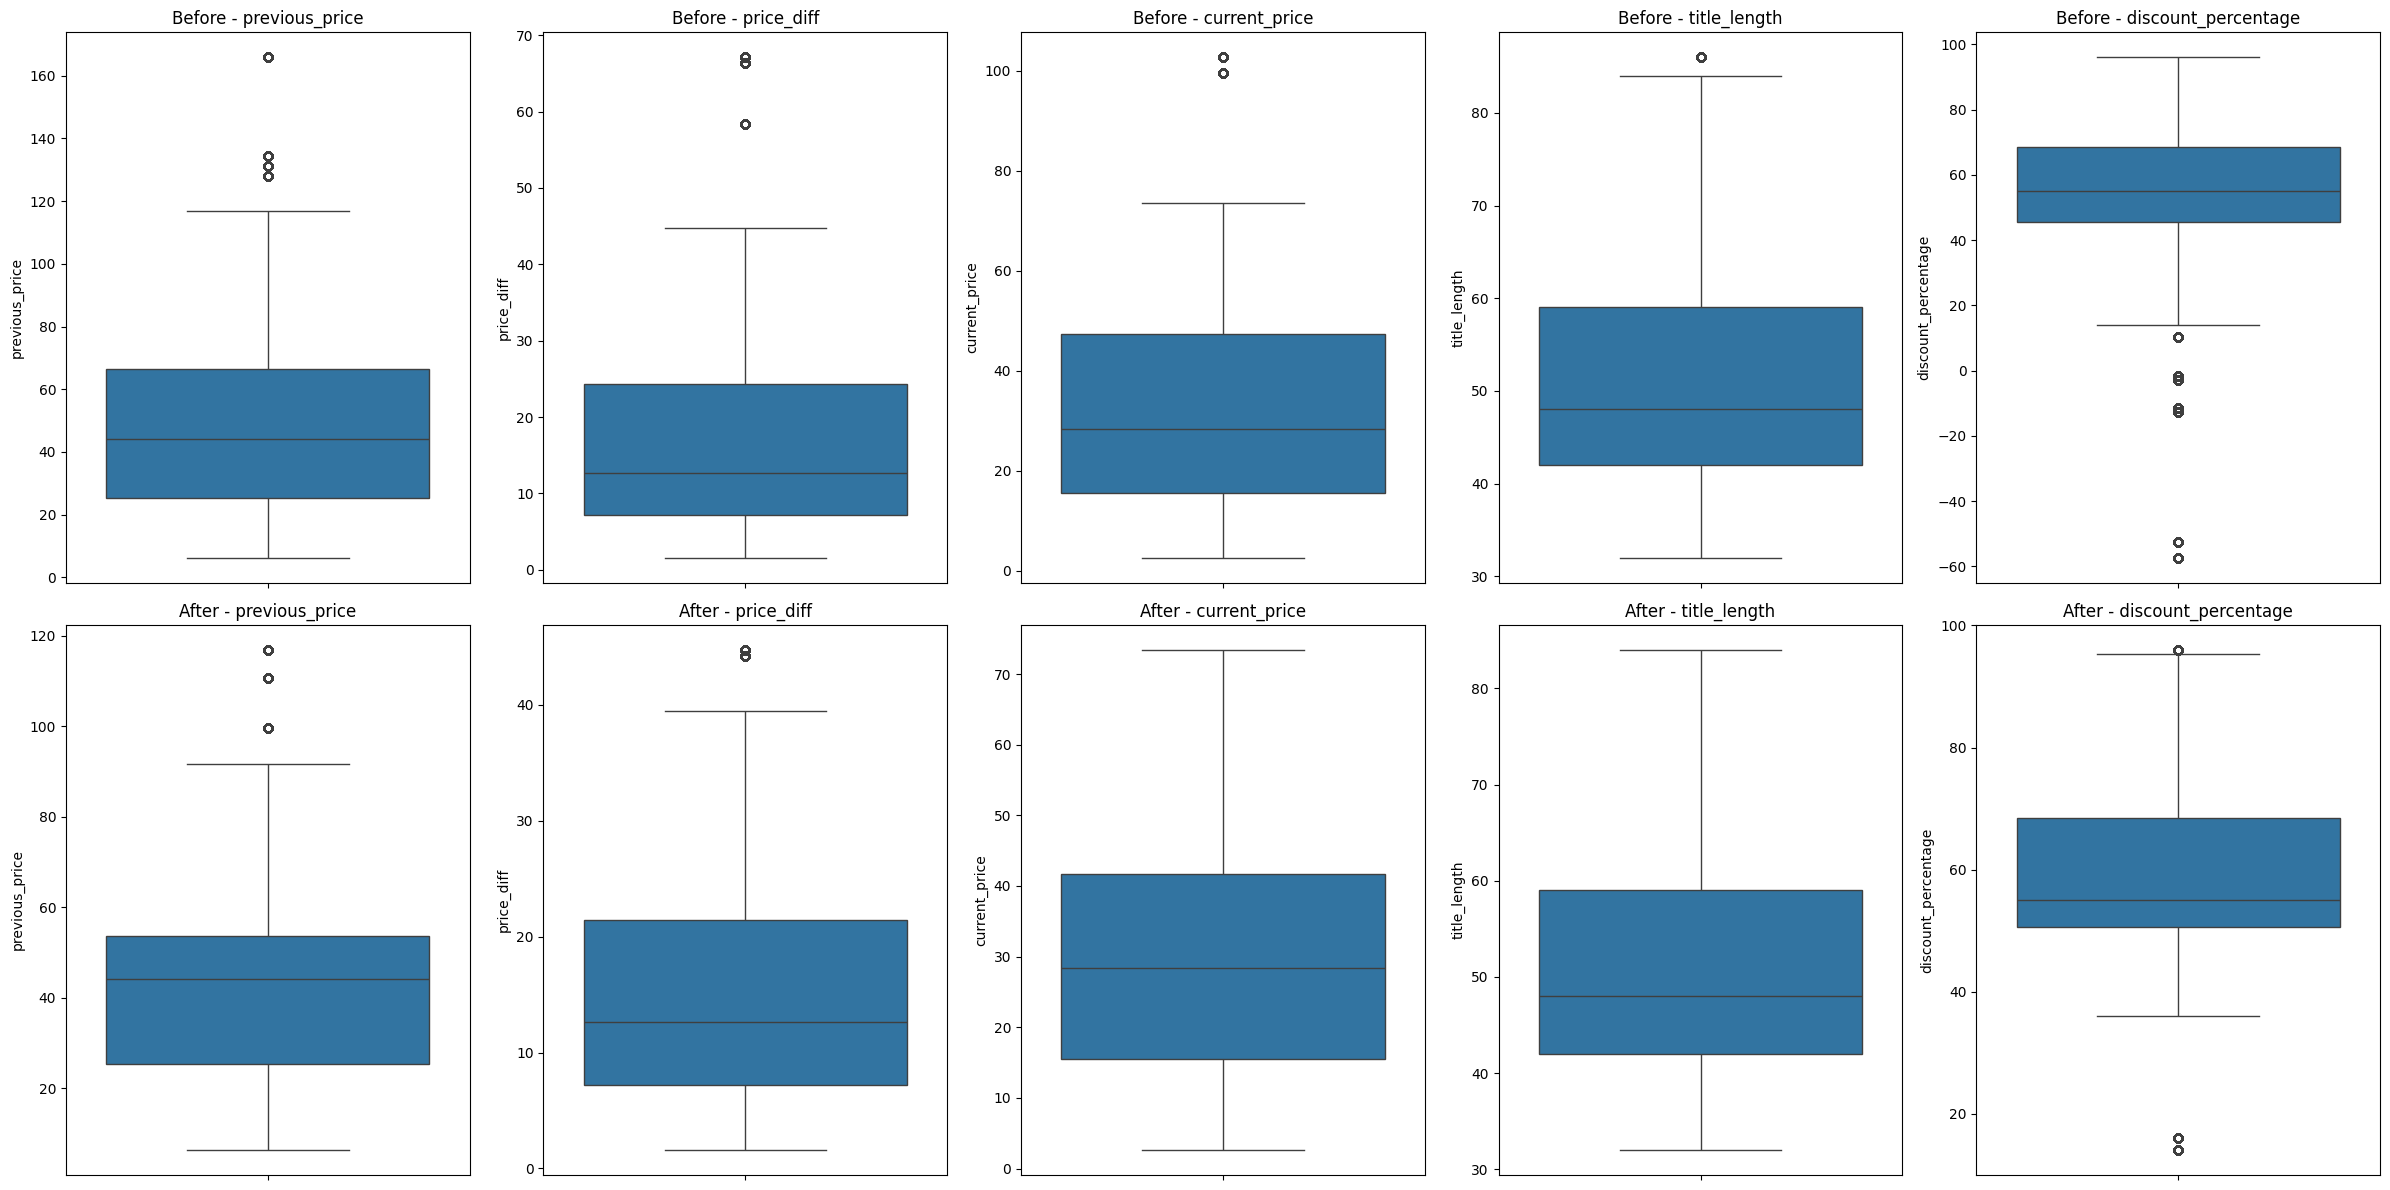

In [ ]:
numerical_cols = ['previous_price', 'price_diff', 'current_price',  'title_length', 'discount_percentage']

def replace_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = series.median()
    return np.where(series < lower_bound, median, np.where(series > upper_bound, median, series))

df_before = df.copy()

for col in numerical_cols:
    df[col] = replace_outliers(df[col])

plt.figure(figsize=(24, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols), i)
    sns.boxplot(data=df_before[col])
    plt.title(f'Before - {col}')

    plt.subplot(2, len(numerical_cols), i + len(numerical_cols))
    sns.boxplot(data=df[col])
    plt.title(f'After - {col}')

plt.tight_layout()
plt.show()


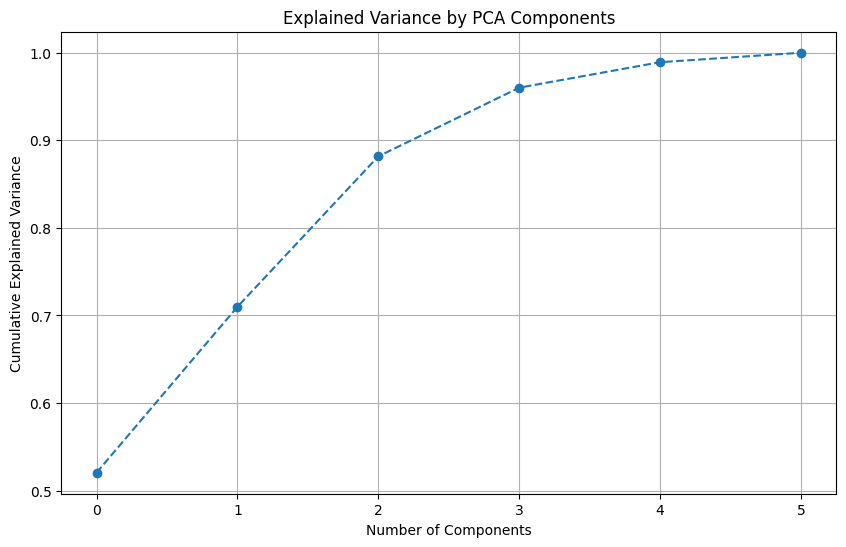

Number of components to retain: 3
        PC1       PC2       PC3
0 -0.970756 -0.646583  1.213426
1  2.302073 -0.378230  0.899104
2  0.993012 -0.327441 -0.338023
3  0.743897 -0.066158  0.345787
4  0.258640 -0.144879  0.244550


In [ ]:
from sklearn.decomposition import PCA

numerical_cols = ['previous_price', 'price_diff', 'current_price', 'rrp', 'title_length', 'discount_percentage']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

pca = PCA()
pca_data = pca.fit_transform(scaled_data)


explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

n_components = np.sum(explained_variance.cumsum() <= 0.95)
print(f"Number of components to retain: {n_components}")

pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

df['brand_popularity'] = df['brand_popularity'].astype(float)

df['user_id'] = np.arange(1, len(df) + 1)
item_ids = df['product_id'].values

ratings = df['discount_percentage'] + df['brand_popularity'] / 1000
user_ids = df['user_id'].values
item_ids = df['product_id'].values

ratings = np.clip(ratings, 0, 5)

df_interactions = pd.DataFrame({
    'user_id': user_ids,
    'item_id': item_ids,
    'rating': ratings
})

df_interactions = df_interactions.groupby(['user_id', 'item_id']).agg({'rating': 'mean'}).reset_index()

user_item_matrix = df_interactions.pivot(index='user_id', columns='item_id', values='rating').fillna(0).values

svd = TruncatedSVD(n_components=20)
user_item_matrix_reduced = svd.fit_transform(user_item_matrix)

item_similarities = cosine_similarity(user_item_matrix_reduced.T)

def get_recommendations_matrix(product_id, num_recommendations=3):
    if product_id not in df['product_id'].values:
        return "Product ID not found in the dataset."

    idx = df[df['product_id'] == product_id].index[0]

    similarity_scores = item_similarities[idx]

    similar_indices = similarity_scores.argsort()[-num_recommendations-1:-1]

    unique_indices = []
    seen_product_ids = set()
    for i in similar_indices:
        product_id_at_i = df.iloc[i]['product_id']
        if product_id_at_i != product_id and product_id_at_i not in seen_product_ids:
            unique_indices.append(i)
            seen_product_ids.add(product_id_at_i)
        if len(unique_indices) >= num_recommendations:
            break

    if len(unique_indices) < num_recommendations:
        unique_indices = similar_indices[:num_recommendations]

    recommended_products = df.iloc[unique_indices]

    return recommended_products


product_id_to_recommend = df['product_id'].iloc[0]
recommended_products_matrix = get_recommendations_matrix(product_id=product_id_to_recommend, num_recommendations=3)
print("Collaborative Filtering Recommendations:")
recommended_products_matrix

Collaborative Filtering Recommendations:


product_id   brand_name  \
47   203474990  ASOS DESIGN   
8    200974969     Parisian   
31       84533  ASOS DESIGN   

                                                title  current_price  \
47  ASOS DESIGN rain coat in black with animal pri...          66.32   
8        Parisian side split flared jeans in charcoal          17.37   
31  ASOS DESIGN jersey suit with obi tie waist in ...          56.06   

    previous_price currency        rrp  productCode    dress_type  price_diff  \
47          110.54      USD  65.234152    120834086          coat       44.22   
8            31.58      USD  39.480000    108438747  flared jeans       14.21   
31           91.59      USD  65.234152    115947978          suit       35.53   

    title_length  discount_percentage  brand_popularity  user_id  
47          62.0            55.003167          0.799349       17  
8           44.0            56.003040          0.292470        1  
31          51.0            14.063418          0.799349       12

In [ ]:
df_copy = df.copy()

df_copy = df_copy.drop_duplicates(subset='product_id', keep='first')

df_copy['brand_name'] = df_copy['brand_name'].astype(str)
df_copy['title'] = df_copy['title'].astype(str)
df_copy['dress_type'] = df_copy['dress_type'].astype(str)

df_copy['combined_features'] = df_copy['title'] + ' ' + df_copy['brand_name'] + ' ' + df_copy['dress_type']

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['combined_features'])

svd = TruncatedSVD(n_components=100)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

nn = NearestNeighbors(n_neighbors=50, algorithm='brute', n_jobs=-1)
nn.fit(tfidf_matrix_reduced)

def get_recommendations_content(product_id, num_recommendations=3):

    if product_id not in df_copy['product_id'].values:
        return "Product ID not found in the dataset."


    idx = df_copy[df_copy['product_id'] == product_id].index[0]


    product_vector = tfidf_matrix_reduced[idx].reshape(1, -1)


    distances, indices = nn.kneighbors(product_vector)



    recommended_indices = indices.flatten()


    unique_indices = []
    seen_product_ids = set()
    for i in recommended_indices:
        if len(unique_indices) >= num_recommendations:
            break
        product_id_at_i = df_copy.iloc[i]['product_id']
        if product_id_at_i != product_id and product_id_at_i not in seen_product_ids:
            unique_indices.append(i)
            seen_product_ids.add(product_id_at_i)


    if len(unique_indices) < num_recommendations:

        print("Not enough unique recommendations available. Expanding search...")


        unique_indices = recommended_indices[:num_recommendations]


    recommended_products = df_copy.iloc[unique_indices]

    return recommended_products


product_id_to_recommend = 203978529
recommended_products_content = get_recommendations_content(product_id=product_id_to_recommend, num_recommendations=3)
print("Content-Based Filtering Recommendations:")
recommended_products_content


Content-Based Filtering Recommendations:


product_id   brand_name  \
43679    13112617  ASOS DESIGN   
43681    23544224  ASOS DESIGN   
43674   202019364  ASOS DESIGN   

                                                   title  current_price  \
43679  ASOS DESIGN t-shirt with crew neck in black - ...           6.32   
43681     ASOS DESIGN oversized joggers in black - BLACK          33.16   
43674  ASOS DESIGN oversized t-shirt in light green w...          18.16   

       previous_price currency        rrp  productCode         dress_type  \
43679            9.47      USD  65.234152      1539996            t-shirt   
43681           44.21      USD  65.234152      1962604            joggers   
43674           30.00      USD  65.234152    115414170  oversized t-shirt   

       price_diff  title_length  discount_percentage  brand_popularity  \
43679        3.15          51.0            90.311823          0.799349   
43681       11.05          46.0            49.167730          0.799349   
43674       11.84          48.0            72.161821          0.799349   

       user_id                                  combined_features  
43679    14567  ASOS DESIGN t-shirt with crew neck in black - ...  
43681    14569  ASOS DESIGN oversized joggers in black - BLACK...  
43674    14562  ASOS DESIGN oversized t-shirt in light green w...

In [ ]:
features = ['brand_name', 'title',  'previous_price', 'rrp',
            'dress_type', 'title_length', 'brand_popularity','discount_percentage']
target = 'current_price'


X = df[features]
y = df[target]

In [ ]:

categorical_features = ['brand_name', 'title',  'dress_type']
numerical_features = [ 'previous_price', 'rrp', 'title_length', 'brand_popularity','discount_percentage']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),

    'Decision Tree Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]),
    'XGB Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor())
    ])
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    predictions[name] = y_pred


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Evaluation Metrics for {name}:")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R^2 Score:", r2)
    print()


Training Linear Regression...
Evaluation Metrics for Linear Regression:
Mean Squared Error: 1.7821307848829673e-08
Root Mean Squared Error: 0.0001334964712972956
Mean Absolute Error: 0.00010089293606870876
R^2 Score: 0.9999999999514708

Training Random Forest Regressor...
Evaluation Metrics for Random Forest Regressor:
Mean Squared Error: 2.654495352249622e-26
Root Mean Squared Error: 1.6292622110174966e-13
Mean Absolute Error: 1.0767547191423109e-13
R^2 Score: 1.0

Training Decision Tree Regressor...
Evaluation Metrics for Decision Tree Regressor:
Mean Squared Error: 2.200325782475604e-25
Root Mean Squared Error: 4.690763032253499e-13
Mean Absolute Error: 2.7945718875415984e-13
R^2 Score: 1.0

Training XGB Regressor...
Evaluation Metrics for XGB Regressor:
Mean Squared Error: 1.1098004670343429e-08
Root Mean Squared Error: 0.00010534706768744647
Mean Absolute Error: 9.079053620768397e-05
R^2 Score: 0.9999999999697791



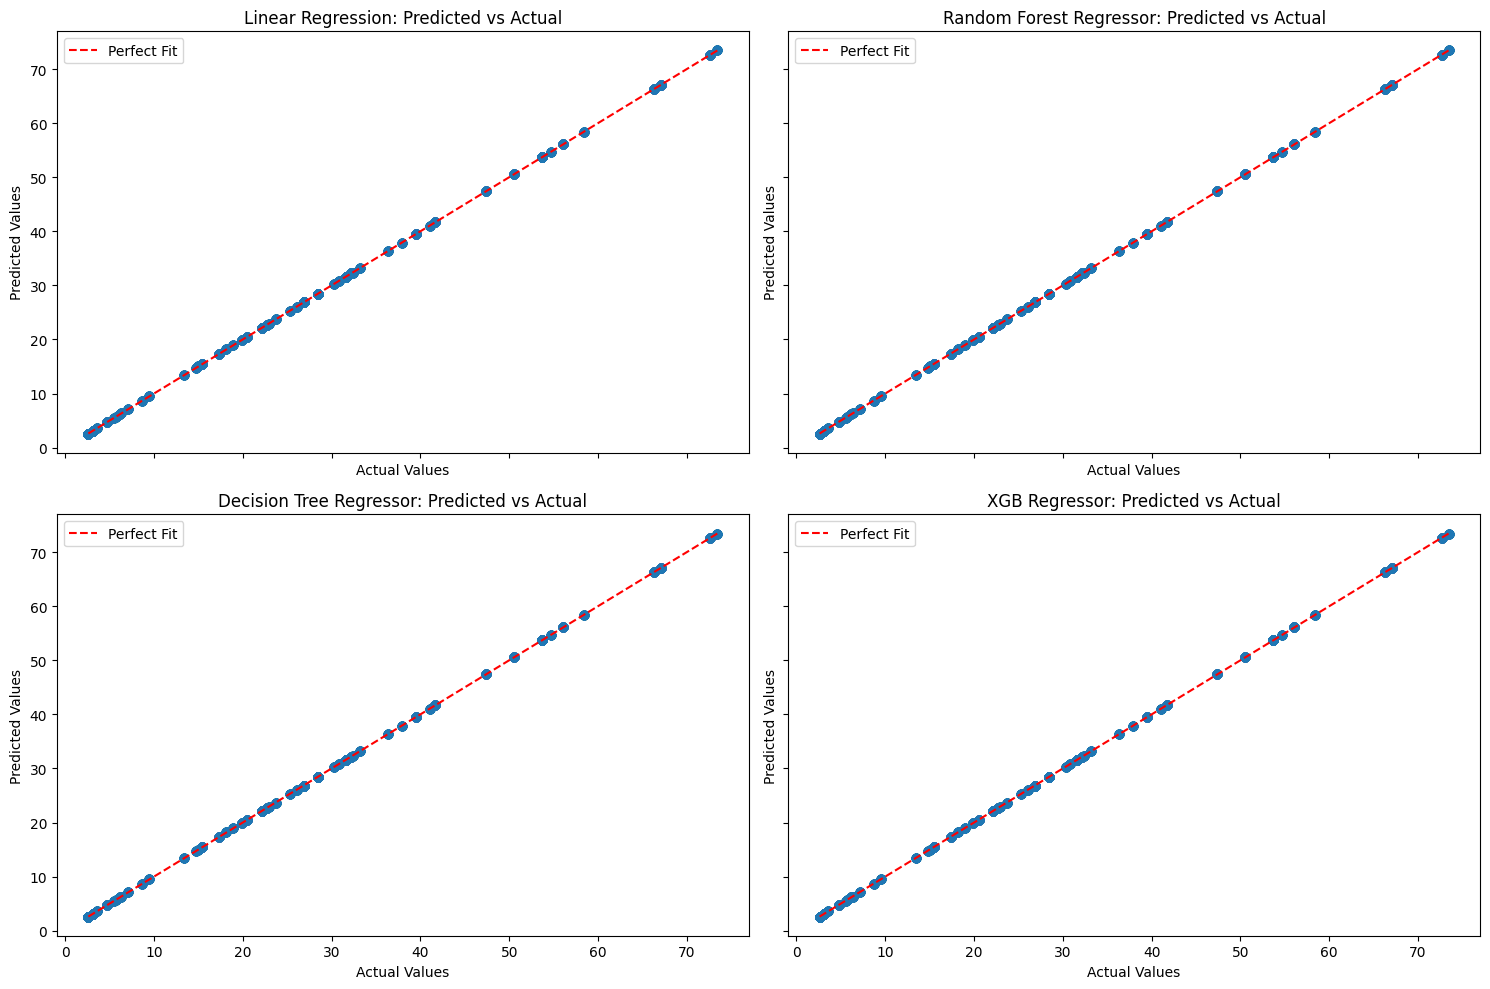

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()


for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}: Predicted vs Actual')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
    ax.legend()

plt.tight_layout()
plt.show()


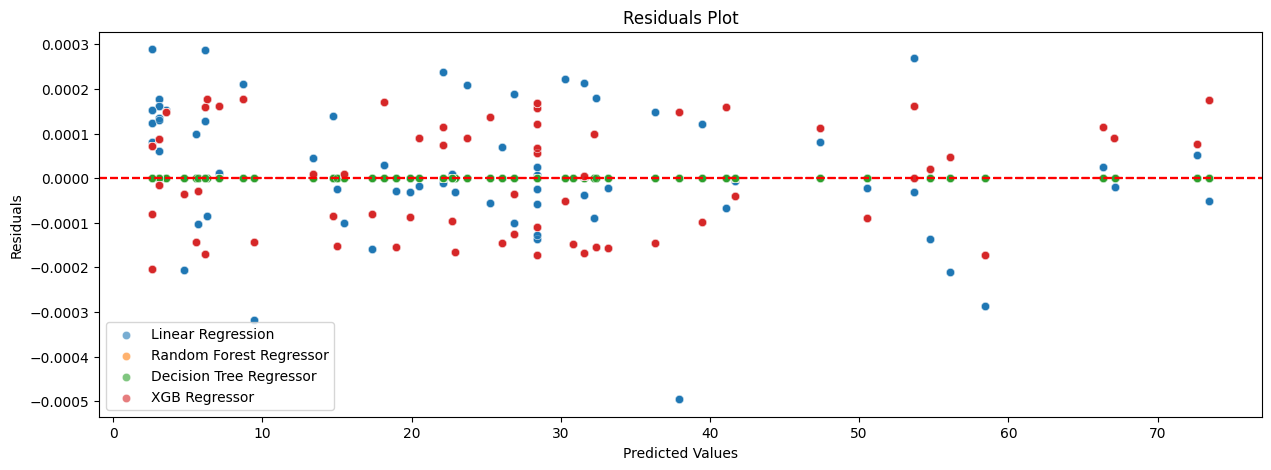

In [ ]:

plt.figure(figsize=(15, 5))

for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.legend()

plt.show()

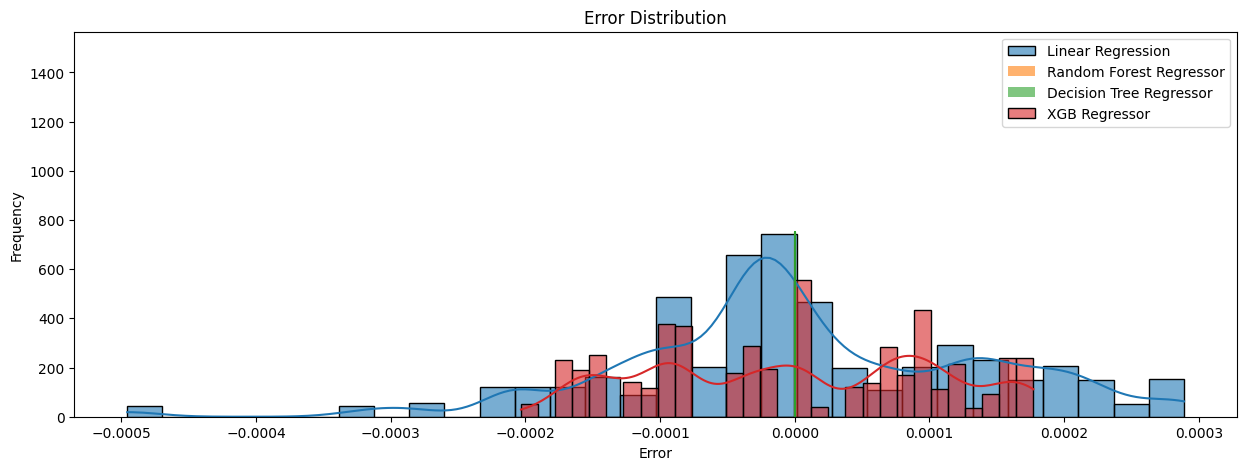

In [ ]:
plt.figure(figsize=(15, 5))

for name, y_pred in predictions.items():
    errors = y_test - y_pred
    sns.histplot(errors, kde=True, label=name, alpha=0.6, bins=30)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Distribution')
    plt.legend()

plt.show()


metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)



In [ ]:
metrics_df

Model           MSE          RMSE           MAE   R2
0        Linear Regression  1.782131e-08  1.334965e-04  1.008929e-04  1.0
1  Random Forest Regressor  2.654495e-26  1.629262e-13  1.076755e-13  1.0
2  Decision Tree Regressor  2.200326e-25  4.690763e-13  2.794572e-13  1.0
3            XGB Regressor  1.109800e-08  1.053471e-04  9.079054e-05  1.0

In [ ]:

features = ['brand_name', 'current_price', 'previous_price', 'currency', 'rrp',
            'dress_type', 'price_diff', 'title_length', 'discount_percentage']
target = 'brand_popularity'


X = df[features]
y = df[target]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['current_price', 'previous_price', 'rrp', 'price_diff', 'title_length', 'discount_percentage']),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['brand_name', 'currency', 'dress_type'])
    ]
)


models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'XGB Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor())
    ]),
    'Decision Tree Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ])
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    predictions[name] = y_pred


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Evaluation Metrics for {name}:")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R^2 Score:", r2)
    print()

print("Model training and evaluation complete.")


Training Linear Regression...
Evaluation Metrics for Linear Regression:
Mean Squared Error: 2.9038568705604055e-30
Root Mean Squared Error: 1.7040706765156209e-15
Mean Absolute Error: 1.3543661401595064e-15
R^2 Score: 1.0

Training Random Forest Regressor...
Evaluation Metrics for Random Forest Regressor:
Mean Squared Error: 1.1529626282354406e-28
Root Mean Squared Error: 1.07376097351107e-14
Mean Absolute Error: 6.6645001753527195e-15
R^2 Score: 1.0

Training XGB Regressor...
Evaluation Metrics for XGB Regressor:
Mean Squared Error: 1.160905636247096e-09
Root Mean Squared Error: 3.4072065335801055e-05
Mean Absolute Error: 2.551662357617844e-05
R^2 Score: 0.9999999722203311

Training Decision Tree Regressor...
Evaluation Metrics for Decision Tree Regressor:
Mean Squared Error: 2.3313514616852178e-28
Root Mean Squared Error: 1.5268763740674024e-14
Mean Absolute Error: 1.0092020068610851e-14
R^2 Score: 1.0

Model training and evaluation complete.


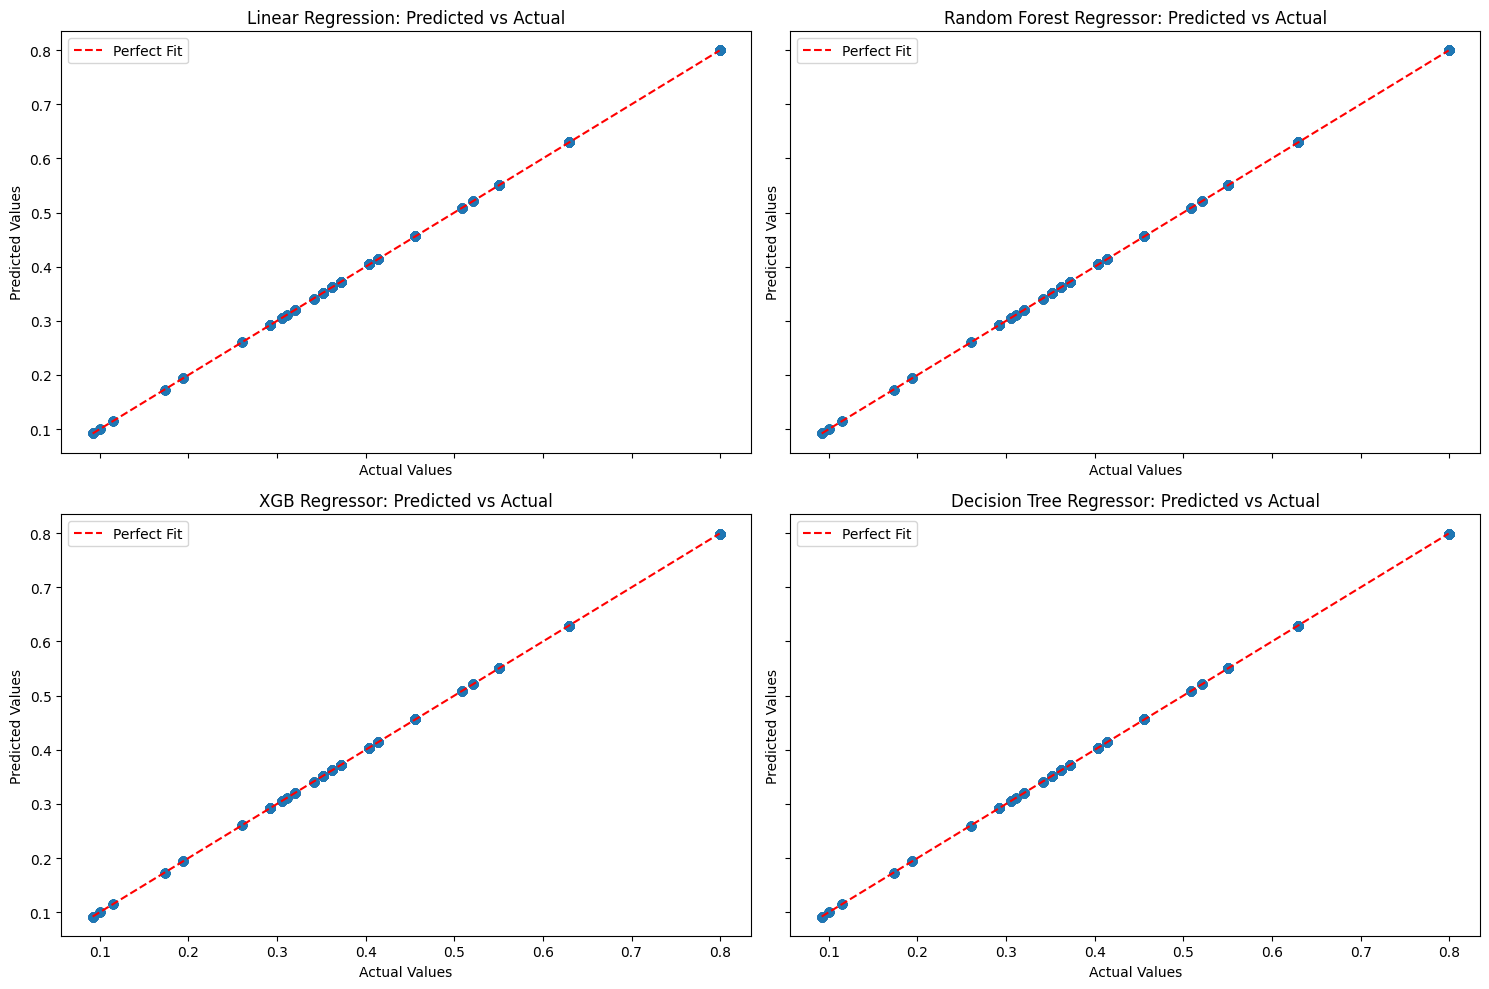

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()


for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}: Predicted vs Actual')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
    ax.legend()

plt.tight_layout()
plt.show()


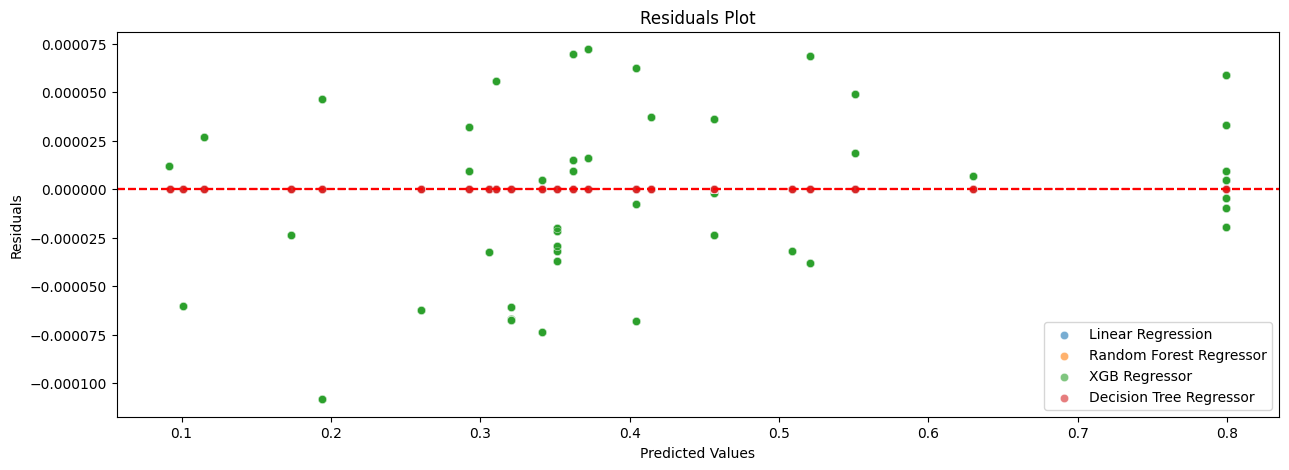

In [ ]:

plt.figure(figsize=(15, 5))

for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, label=name, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.legend()

plt.show()

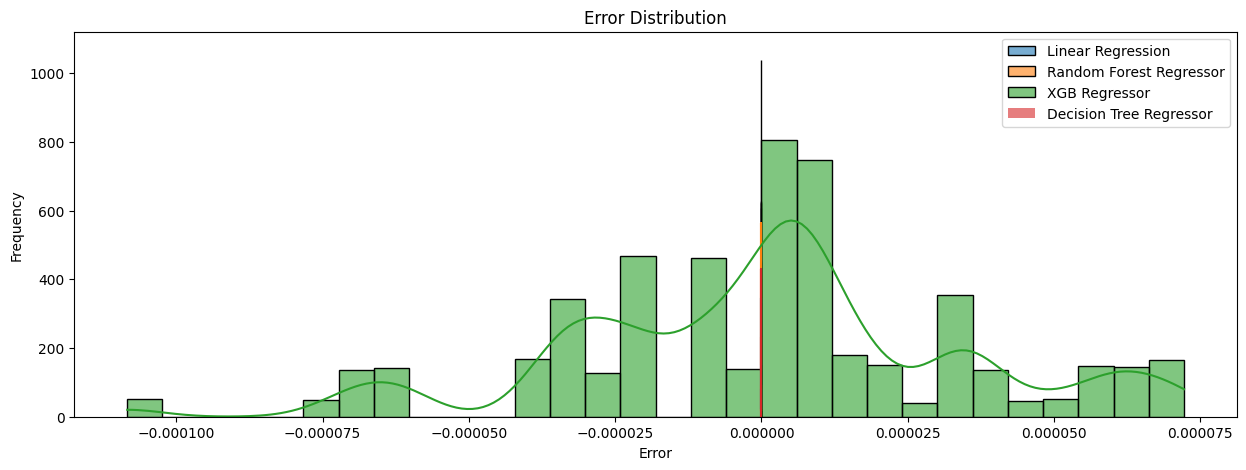

In [ ]:
plt.figure(figsize=(15, 5))

for name, y_pred in predictions.items():
    errors = y_test - y_pred
    sns.histplot(errors, kde=True, label=name, alpha=0.6, bins=30)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Distribution')
    plt.legend()

plt.show()


metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)



In [ ]:
metrics_df

Model           MSE          RMSE           MAE   R2
0        Linear Regression  2.903857e-30  1.704071e-15  1.354366e-15  1.0
1  Random Forest Regressor  1.152963e-28  1.073761e-14  6.664500e-15  1.0
2            XGB Regressor  1.160906e-09  3.407207e-05  2.551662e-05  1.0
3  Decision Tree Regressor  2.331351e-28  1.526876e-14  1.009202e-14  1.0